In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [50]:
df = pd.read_csv('UDIDDATA(India).csv')
df.head()

,state_name,district_name,disability_type,age_lower,age_upper,Male_count,female_count,total
0,Maharashtra,Yavatmal,Acid Attack Victim,35,60,1,0,1
1,Maharashtra,Yavatmal,Acid Attack Victim,60,80,0,1,1
2,Haryana,Yamunanagar,Acid Attack Victim,15,35,1,0,1
3,Haryana,Yamunanagar,Acid Attack Victim,35,60,4,0,4
4,Karnataka,Yadgir,Acid Attack Victim,15,35,5,8,13


In [51]:
df.columns

Index(['state_name', 'district_name', 'disability_type', 'age_lower',
       'age_upper', 'Male_count', 'female_count', 'total'],
      dtype='object')

In [52]:
# Assuming the 'target_column' is your target variable
X = data.drop('disability_type', axis=1)  # Features
y = data['disability_type']  # Target variable

In [53]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical columns
label_encoder_state = LabelEncoder()
X['state_name_encoded'] = label_encoder_state.fit_transform(X['state_name'])

label_encoder_district = LabelEncoder()
X['district_name_encoded'] = label_encoder_district.fit_transform(X['district_name'])

# Drop the original categorical columns
X.drop(['state_name', 'district_name'], axis=1, inplace=True)


In [54]:
X

,age_lower,age_upper,Male_count,female_count,total,state_name_encoded,district_name_encoded
0,35,60,1,0,1,20,732
1,60,80,0,1,1,20,732
2,15,35,1,0,1,11,730
3,35,60,4,0,4,11,730
4,15,35,5,8,13,15,729
...,...,...,...,...,...,...,...
52941,6,15,2,0,2,33,4
52942,15,35,5,4,9,33,4
52943,0,6,1,0,1,19,3
52944,6,15,1,0,1,19,3


In [55]:
y

0        Acid Attack Victim
1        Acid Attack Victim
2        Acid Attack Victim
3        Acid Attack Victim
4        Acid Attack Victim
                ...        
52941           Thalassemia
52942           Thalassemia
52943           Thalassemia
52944           Thalassemia
52945           Thalassemia
Name: disability_type, Length: 52946, dtype: object

In [57]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit a RandomForestClassifier (you can choose any other classifier)
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
predictions = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.18092540132200188


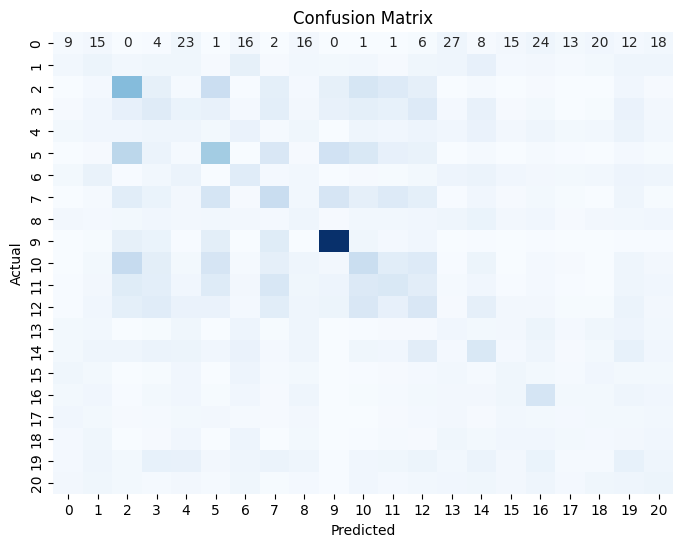

In [64]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [65]:
from sklearn.tree import DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

# Make predictions
predictions = tree_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.15939565627950897


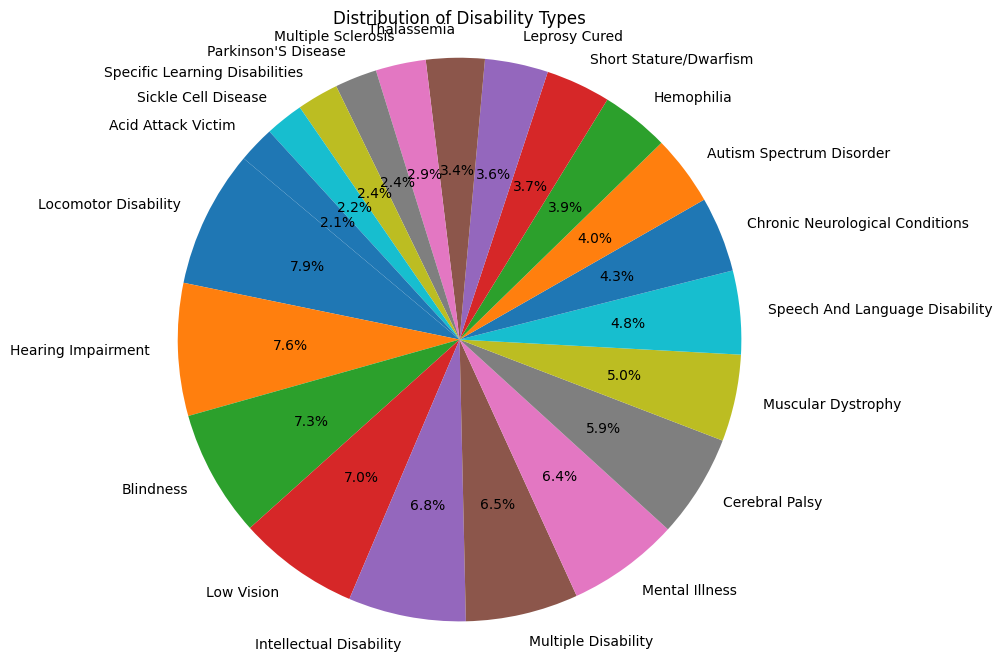

In [68]:
import matplotlib.pyplot as plt

# Pie chart
disability_type_counts = y.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(disability_type_counts, labels=disability_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Disability Types')
plt.show()


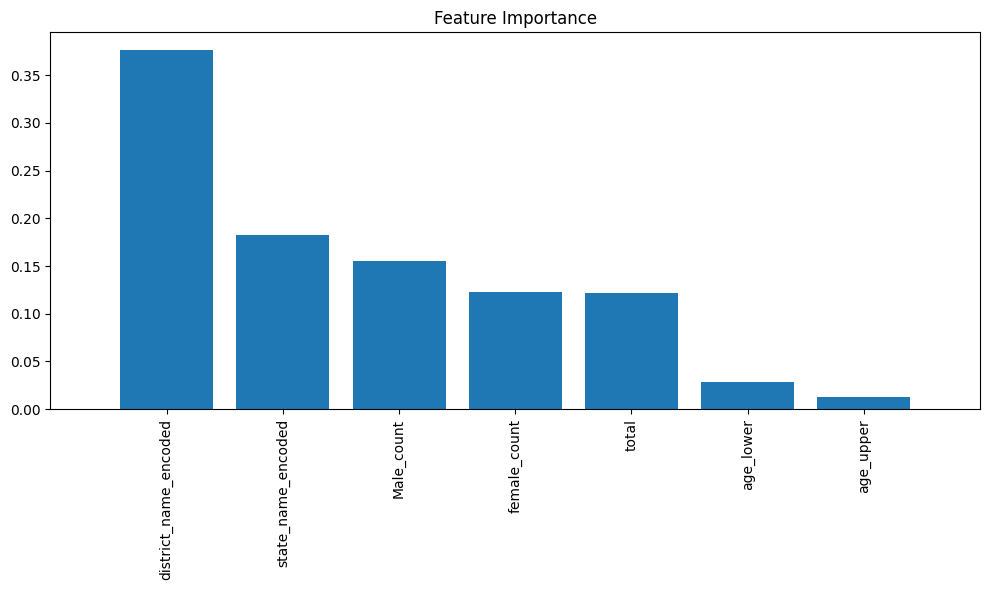

Analysis Information:
Total number of samples: 52946


KeyError: 'state_name'

In [71]:
# Plotting feature importance
importances = tree_classifier.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()

# Analysis information
print("Analysis Information:")
print(f"Total number of samples: {len(data)}")
print(f"Number of unique 'state_name': {len(data['state_name'].unique())}")
print(f"Number of unique 'district_name': {len(data['district_name'].unique())}")
print(f"Number of unique 'disability_type': {len(data['disability_type'].unique())}")

In [72]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Making predictions
predictions = nb_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Naive Bayes Classifier Accuracy: {accuracy}")

Naive Bayes Classifier Accuracy: 0.10623229461756374
